## Libraries import

In [1]:
library(tidyverse)
library(ggridges)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

## Data loading

In [2]:
avatar_100 <- read.csv("../../datasets/WBCD/WBCD_base_100times.csv")

In [3]:
head(avatar_100)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iter
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1,2,0
2,6,3,4,1,5,2,3,9,1,4,0
3,5,1,1,2,2,1,2,1,1,2,0
4,5,4,5,1,6,1,5,3,1,4,0
5,4,1,1,3,2,1,3,1,1,2,0
6,10,10,10,3,8,1,8,5,1,4,0


In [4]:
original <- read.csv("../../datasets/WBCD/breast_cancer_wisconsin.csv")[,-1]

## Graphical parameters

In [5]:
colors <- read.csv("../../color.csv", stringsAsFactors = FALSE)
rownames(colors) <- colors$type

In [6]:
axis_title_size <- 19
axis_text_size <- 19
legend_text_size <- 19
legend_title_size <- 19

## Function

In [7]:
f_score <- function(X, y, val1 = 2, val2 = 4) {
    X1 = X[y == val1]
    X2 = X[y == val2]
    mean_X = mean(X)
    mean_X1 = mean(X1)
    mean_X2 = mean(X2)
    n_X1 = length(X1)
    n_X2 = length(X2)
    sum_X1 = sum((X1 - mean_X1)^2)
    sum_X2 = sum((X2 - mean_X2)^2)
    return(((mean_X1 - mean_X)^2 + (mean_X2 - mean_X)^2) / (((1 / (n_X1 - 1)) * sum_X1) + ((1 / (n_X2 - 1))*sum_X2)))
}

In [8]:
res_original <- as.data.frame(apply(original[,-c(ncol(original))], MARGIN = 2, function(x){f_score(X = x, y = original$Class)}))
colnames(res_original) <- "Fscores"
res_original$var <- rownames(res_original)
res_original$y <- rank(res_original$Fscores)

In [9]:
res_avatar_100 <- data.frame()
for (i in unique(avatar_100$iter)) {
    avatar_temp <- subset(x = avatar_100, subset = (iter == i))
    res_avatar <- as.data.frame(apply(avatar_temp[,-c((ncol(avatar_temp)-1):ncol(avatar_temp))], MARGIN = 2, function(x){f_score(X = x, y = avatar_temp$Class)}))
    colnames(res_avatar) <- "Fscores"
    res_avatar$iter <- i
    res_avatar$var <- rownames(res_avatar)
    res_avatar$y <- res_original$Fscores
    res_avatar_100 <- rbind(res_avatar_100, res_avatar)
}

In [10]:
names_df <- gsub('[[:digit:]]+', '', rownames(res_avatar_100))
names_df <- str_to_title(names_df)
names_df <- gsub('_', ' ', names_df)
res_avatar_100["name_var"] <- names_df

## Graphical representation

Picking joint bandwidth of 0.0423



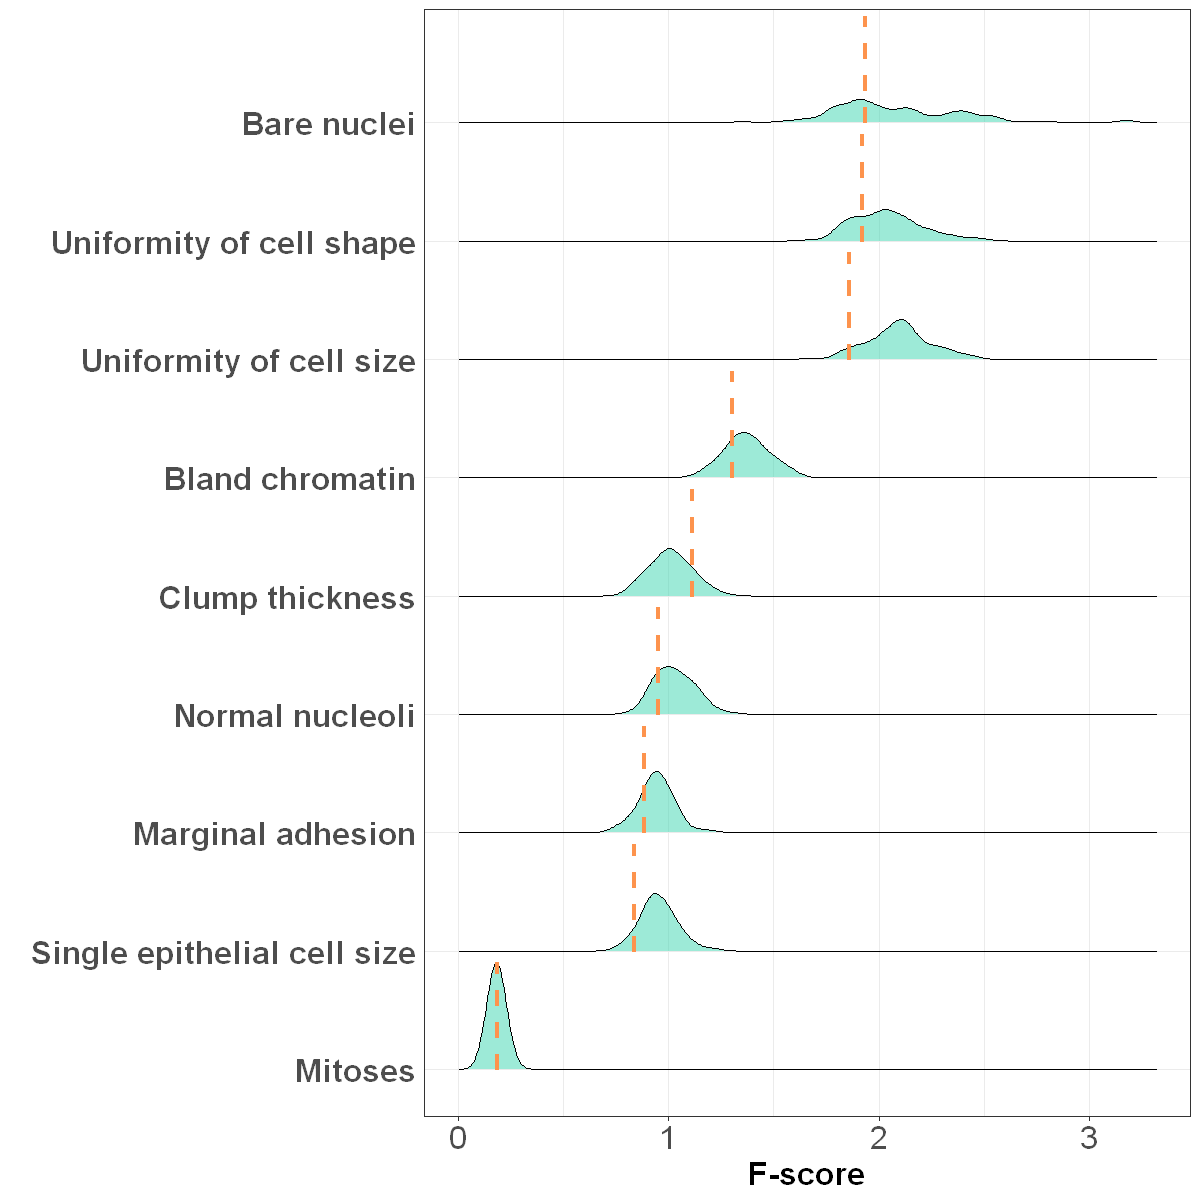

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot() +
    geom_density_ridges(data = res_avatar_100, aes(x = Fscores, y = reorder(name_var, y)), scale = 0.9, size = 0.2, alpha = 0.5, fill = colors["avatar", "color"]) +
    geom_segment(data = res_original, aes(x = Fscores, xend = Fscores, y = y - 0.01, yend = y + 0.9), col = colors["original", "color"], size = 1.4, lty = 2) +
    theme_bw() +
    ylab("") +
    xlab("F-score") +
    scale_y_discrete(expand = expansion(mult = c(0.05, 0.12))) +
    theme(axis.title.x = element_text(size = axis_title_size, face = "bold"),
          axis.text.x = element_text(size = axis_text_size),
          axis.text.y = element_text(color = "gray30", size = axis_text_size, face = "bold"),
          axis.ticks.y = element_blank())

Picking joint bandwidth of 0.0423



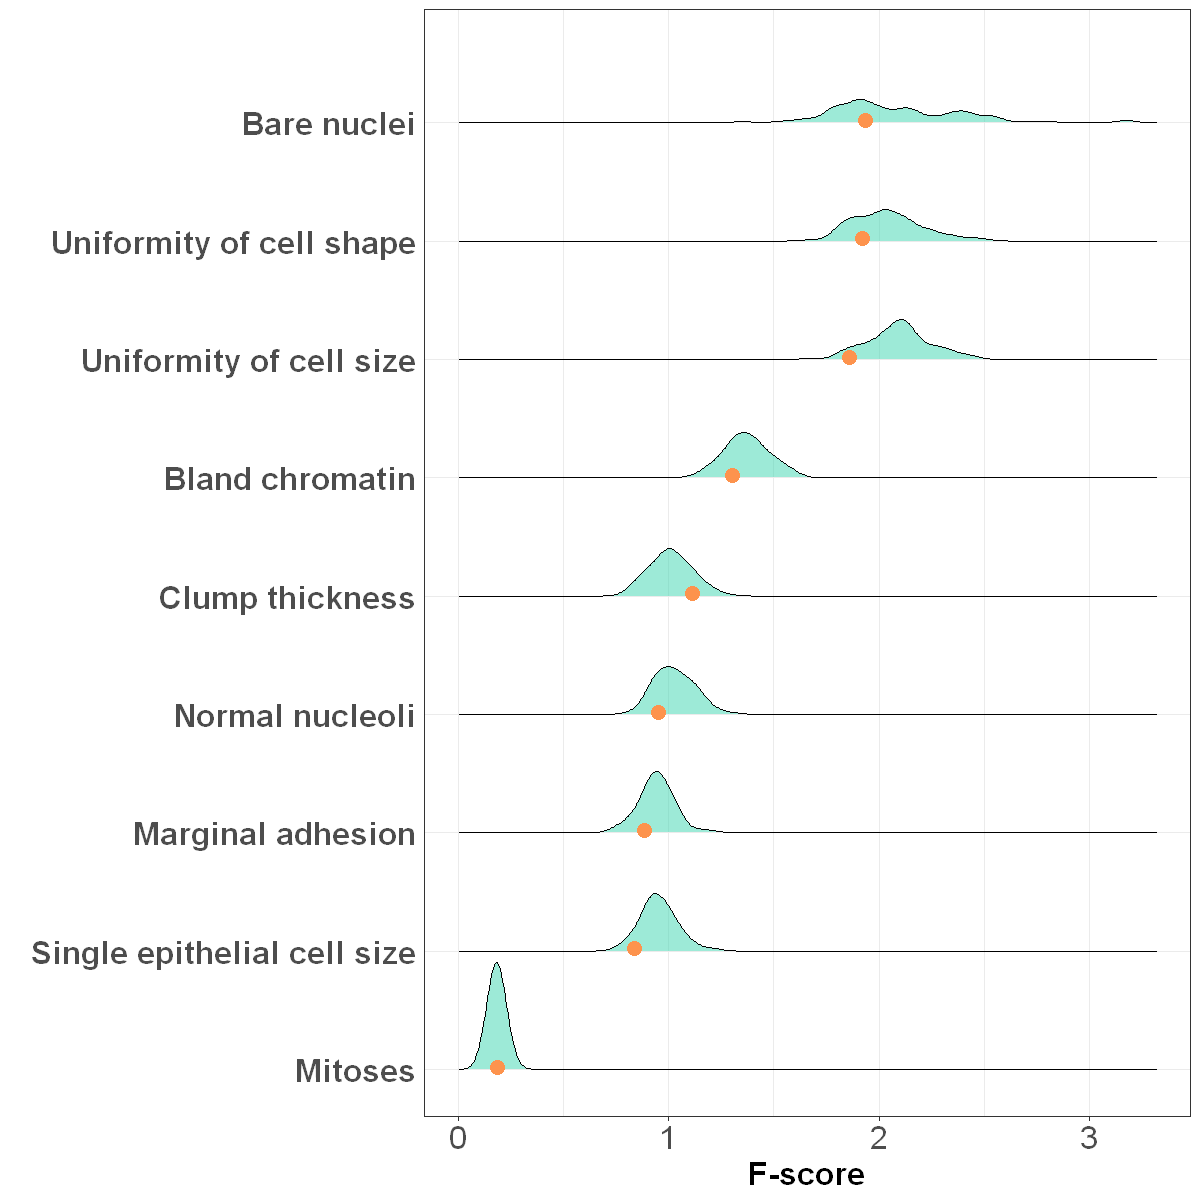

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot() +
    geom_density_ridges(data = res_avatar_100, aes(x = Fscores, y = reorder(name_var, y)), scale = 0.9, size = 0.2, alpha = 0.5, fill = colors["avatar", "color"]) +
    geom_point(data = res_original, aes(x = Fscores, y = y + 0.02), col = colors["original", "color"], size = 4) +
    theme_bw() +
    ylab("") +
    xlab("F-score") +
    scale_y_discrete(expand = expansion(mult = c(0.05, 0.12))) +
    theme(axis.title.x = element_text(size = axis_title_size, face = "bold"),
          axis.text.x = element_text(size = axis_text_size),
          axis.text.y = element_text(color = "gray30", size = axis_text_size, face = "bold"),
          axis.ticks.y = element_blank())